###Dependencies: 

numpy pandas matplotlib

###Run Ipython notebook from HPC 

https://github.com/pyHPC/ipynbhpc

Instructions: 

http://avsl.cct.lsu.edu/IPython-remote-sshtunnel.html

In [11]:
from __future__ import division
from numpy.random import randn
import numpy as np
import pandas as pd


#from scipy import stats, integrate
import matplotlib.pyplot as plt
#import seaborn as sns

%matplotlib inline

np.set_printoptions(precision=4)
np.random.seed(sum(map(ord, "distributions")))

In [ ]:
import math
math.sqrt(0.26)

In [ ]:
!pwd

In [ ]:
!ls 

In [168]:
# take a look at the text data file
!head -n 10 allrounds_2013.txt

1,Adelaide,Essendon,82,117
1,Fremantle,West Coast,108,80
1,Carlton,Richmond,101,106
1,Western Bulldogs,Brisbane Lions,127,59
1,Greater Western Sydney,Sydney,76,106
1,Gold Coast,St Kilda,90,77
1,Melbourne,Port Adelaide,54,133
1,North Melbourne,Collingwood,87,103
1,Hawthorn,Geelong,86,93
2,St Kilda,Richmond,82,99


In [169]:
# load data into pandas dataframe

game = pd.read_csv('allrounds_2013.txt',
                    names=['Round', 'team1', 'team2', 'team1score', 'team2score'])
game[:5]

,Round,team1,team2,team1score,team2score
0,1,Adelaide,Essendon,82,117
1,1,Fremantle,West Coast,108,80
2,1,Carlton,Richmond,101,106
3,1,Western Bulldogs,Brisbane Lions,127,59
4,1,Greater Western Sydney,Sydney,76,106


In [ ]:
# use seaborn

#import seaborn as sns
#sns.set()

In [ ]:
#sns.jointplot(x="team1score", y="team2score", data=game, kind='reg')

In [ ]:
#sns.jointplot(x="team1score", y="team2score", data=game, kind='kde')

In [ ]:
#f, ax = plt.subplots(figsize=(6, 6))
#cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
#sns.kdeplot(game.team1score, game.team2score, cmap=cmap, n_levels=60, shade=True)

In [ ]:
# pivot_table
game['lead1'] = game.team1score - game.team2score
team1_team2 = game.pivot_table('lead1', index='team2', 
                              columns='team1')
team1_team2

In [172]:
#18 teams 
team1_team2.shape

(18, 18)

In [171]:
#each team play 11 games as team1 or team2. so total games played is 22
team1_team2['Adelaide'].isnull().sum()

7

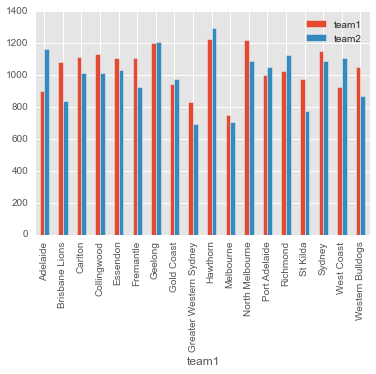

In [173]:
#total score for team1 teams, and team2 teams
#don't see obvious bias if a team plays as team1 or team2

team1_score = game.pivot_table('team1score', #index='team2', 
                              columns='team1', aggfunc=sum)
team2_score = game.pivot_table('team2score', #index='team2', 
                              columns='team2', aggfunc=sum)
#team1_score.plot()
pd.DataFrame({'team1':team1_score, 'team2':team2_score}).plot(kind='bar')

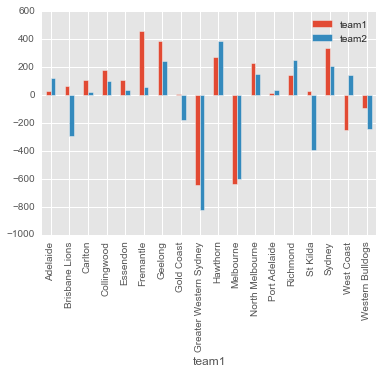

In [174]:
#lead score as team1, and team2
#game['lead1'] = game.team1score - game.team2score
team1_perf = game.pivot_table('lead1', #index='team2', 
                              columns='team1', aggfunc=sum)
team1_perf

game['lead2'] = game.team2score - game.team1score
team2_perf = game.pivot_table('lead2', #index='team1', 
                              columns='team2', aggfunc=sum)
#team2_perf
pd.DataFrame({'team1':team1_perf, 'team2':team2_perf}).plot(kind='bar')

In [175]:
#for each team, add its performance as team1, and team2
perf = team1_perf + team2_perf
perf

team1
Adelaide                   155
Brisbane Lions            -222
Carlton                    133
Collingwood                280
Essendon                   145
Fremantle                  517
Geelong                    633
Gold Coast                -173
Greater Western Sydney   -1466
Hawthorn                   664
Melbourne                -1236
North Melbourne            377
Port Adelaide               49
Richmond                   400
St Kilda                  -369
Sydney                     550
West Coast                -101
Western Bulldogs          -336
dtype: int64

In [176]:
#sort performance to rank teams
perf.sort(ascending=False)
perf

team1
Hawthorn                   664
Geelong                    633
Sydney                     550
Fremantle                  517
Richmond                   400
North Melbourne            377
Collingwood                280
Adelaide                   155
Essendon                   145
Carlton                    133
Port Adelaide               49
West Coast                -101
Gold Coast                -173
Brisbane Lions            -222
Western Bulldogs          -336
St Kilda                  -369
Melbourne                -1236
Greater Western Sydney   -1466
dtype: int64

In [177]:
#sorted team names by performance
sorted_team = perf.index.values
sorted_team

array(['Hawthorn', 'Geelong', 'Sydney', 'Fremantle', 'Richmond',
       'North Melbourne', 'Collingwood', 'Adelaide', 'Essendon', 'Carlton',
       'Port Adelaide', 'West Coast', 'Gold Coast', 'Brisbane Lions',
       'Western Bulldogs', 'St Kilda', 'Melbourne',
       'Greater Western Sydney'], dtype=object)

In [178]:
#make two empty dataframes
df = pd.DataFrame({})
df2 = pd.DataFrame({})

In [179]:
# when use group function, all NaN values are stripped
# group by team1: each group is a team played in team1

for groupid, group in game.groupby(['team1']):
    #print groupid, group.lead.values
    if groupid == 'Adelaide':
        print group
    #c = group.sort('lead', ascending=False)
    #print groupid, c.lead.values
    #print df[groupid]
    df[groupid] = group.lead1.values
df 
#df[sorted_team]


     Round     team1             team2  team1score  team2score  lead1  lead2
0        1  Adelaide          Essendon          82         117    -35     35
34       4  Adelaide  Western Bulldogs          80          28     52    -52
48       6  Adelaide          Hawthorn          78          89    -11     11
71       8  Adelaide          St Kilda          87          47     40    -40
83      10  Adelaide         Fremantle          59          66     -7      7
92      11  Adelaide            Sydney          50         127    -77     77
121     15  Adelaide        West Coast          69          75     -6      6
142     17  Adelaide           Geelong          94          92      2     -2
160     19  Adelaide     Port Adelaide         103         107     -4      4
169     20  Adelaide   North Melbourne          79          70      9     -9
181     22  Adelaide         Melbourne         120          52     68    -68


,Adelaide,Brisbane Lions,Carlton,Collingwood,Essendon,Fremantle,Geelong,Gold Coast,Greater Western Sydney,Hawthorn,Melbourne,North Melbourne,Port Adelaide,Richmond,St Kilda,Sydney,West Coast,Western Bulldogs
0,-35,-19,-5,17,148,28,4,13,-30,-7,-79,-16,56,67,-17,41,-50,68
1,52,28,32,-55,46,-4,16,-2,-72,42,-94,-39,9,-34,-37,-21,-24,-28
2,-11,-26,61,26,39,1,28,-38,-44,3,41,63,5,-44,-16,60,70,-21
3,40,-13,18,6,-10,27,52,-45,-135,37,-60,10,-41,34,9,0,2,-54
4,-7,-49,94,-47,5,90,41,32,-100,83,-95,-1,-48,-29,-9,44,-41,9
5,-77,5,-15,34,43,40,10,15,-59,26,-83,68,18,38,-4,22,-7,-60
6,-6,33,-41,27,30,38,68,-28,-75,20,3,86,35,64,35,129,-28,-31
7,2,12,36,40,-56,30,101,7,-4,58,-31,62,-45,9,-5,47,-34,22
8,-4,31,-36,79,-53,22,25,-43,-39,19,-19,-1,9,27,-46,-29,17,-35
9,9,60,-28,62,-45,113,44,13,37,-41,-122,10,17,23,46,59,-66,17


In [180]:
for groupid, group in game.groupby(['team2']):
    #c = group.sort('lead2', ascending=False)
    df2[groupid] = group.lead2.values
df2
#df2[sorted_team]
#df.reindex_axis(sorted(df.columns), axis=1)
#df.reindex_axis(sorted_team, axis=1)

,Adelaide,Brisbane Lions,Carlton,Collingwood,Essendon,Fremantle,Geelong,Gold Coast,Greater Western Sydney,Hawthorn,Melbourne,North Melbourne,Port Adelaide,Richmond,St Kilda,Sydney,West Coast,Western Bulldogs
0,19,-68,-17,16,35,28,7,-41,-56,50,-148,-4,79,5,-13,30,-28,-67
1,-9,2,-16,34,4,-42,21,44,-41,55,-28,-3,38,17,72,39,94,-52
2,-32,-63,24,-46,37,45,21,60,-39,11,-61,54,-10,-1,-26,16,-5,-70
3,135,-60,-9,-27,-28,0,44,-26,-83,95,-34,-2,-18,41,-40,-37,26,-32
4,1,10,13,49,29,7,-6,-52,-94,15,-90,-15,-9,41,-68,47,100,9
5,-38,-40,-5,83,-44,-41,48,-43,-86,-10,-35,-38,75,60,-64,77,4,-34
6,28,-58,-22,-35,7,28,59,-33,-129,45,-68,-12,-30,-62,-30,-18,-20,-3
7,-27,19,1,41,31,-27,-5,-9,-40,56,-37,122,5,-47,-36,31,6,4
8,-22,-9,43,-7,39,36,-2,-17,-113,46,-13,-9,4,41,-101,34,-22,-19
9,-17,-23,10,29,-79,95,-10,-17,-60,14,-68,45,-25,121,-31,35,53,28


In [181]:
# concatenate two dataframe
# total 22 games played for each team

frames = [df, df2]

result = pd.concat(frames, ignore_index=True)
result

,Adelaide,Brisbane Lions,Carlton,Collingwood,Essendon,Fremantle,Geelong,Gold Coast,Greater Western Sydney,Hawthorn,Melbourne,North Melbourne,Port Adelaide,Richmond,St Kilda,Sydney,West Coast,Western Bulldogs
0,-35,-19,-5,17,148,28,4,13,-30,-7,-79,-16,56,67,-17,41,-50,68
1,52,28,32,-55,46,-4,16,-2,-72,42,-94,-39,9,-34,-37,-21,-24,-28
2,-11,-26,61,26,39,1,28,-38,-44,3,41,63,5,-44,-16,60,70,-21
3,40,-13,18,6,-10,27,52,-45,-135,37,-60,10,-41,34,9,0,2,-54
4,-7,-49,94,-47,5,90,41,32,-100,83,-95,-1,-48,-29,-9,44,-41,9
5,-77,5,-15,34,43,40,10,15,-59,26,-83,68,18,38,-4,22,-7,-60
6,-6,33,-41,27,30,38,68,-28,-75,20,3,86,35,64,35,129,-28,-31
7,2,12,36,40,-56,30,101,7,-4,58,-31,62,-45,9,-5,47,-34,22
8,-4,31,-36,79,-53,22,25,-43,-39,19,-19,-1,9,27,-46,-29,17,-35
9,9,60,-28,62,-45,113,44,13,37,-41,-122,10,17,23,46,59,-66,17


In [182]:
# sort each column separatly

sortedteamplay = pd.DataFrame({})

for team in sorted_team:
    teamplay = result[team].copy()
    teamplay.sort(ascending=False)
    sortedteamplay[team] = teamplay.values

sortedteamplay

,Hawthorn,Geelong,Sydney,Fremantle,Richmond,North Melbourne,Collingwood,Adelaide,Essendon,Carlton,Port Adelaide,West Coast,Gold Coast,Brisbane Lions,Western Bulldogs,St Kilda,Melbourne,Greater Western Sydney
0,95,101,129,113,121,122,83,135,148,94,79,100,83,60,68,72,41,37
1,83,68,77,95,67,86,79,86,46,61,75,94,60,33,28,71,3,-4
2,58,66,60,90,64,68,62,68,43,43,56,70,44,31,22,46,-13,-30
3,56,59,59,74,60,63,49,52,39,36,38,53,32,28,20,35,-19,-39
4,55,52,47,45,41,62,41,40,39,32,35,26,15,19,17,9,-20,-39
5,50,48,47,40,41,54,40,28,37,24,18,17,13,12,9,-4,-28,-40
6,46,44,44,38,41,45,34,19,35,18,17,6,13,10,9,-5,-31,-41
7,45,44,41,36,39,11,34,9,31,13,9,4,7,7,4,-9,-34,-44
8,42,41,39,30,38,10,29,2,30,10,9,2,-2,5,-3,-13,-35,-56
9,37,28,35,28,34,10,27,1,29,1,5,-5,-9,2,-7,-16,-37,-59


In [183]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

import matplotlib.pyplot as plt
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


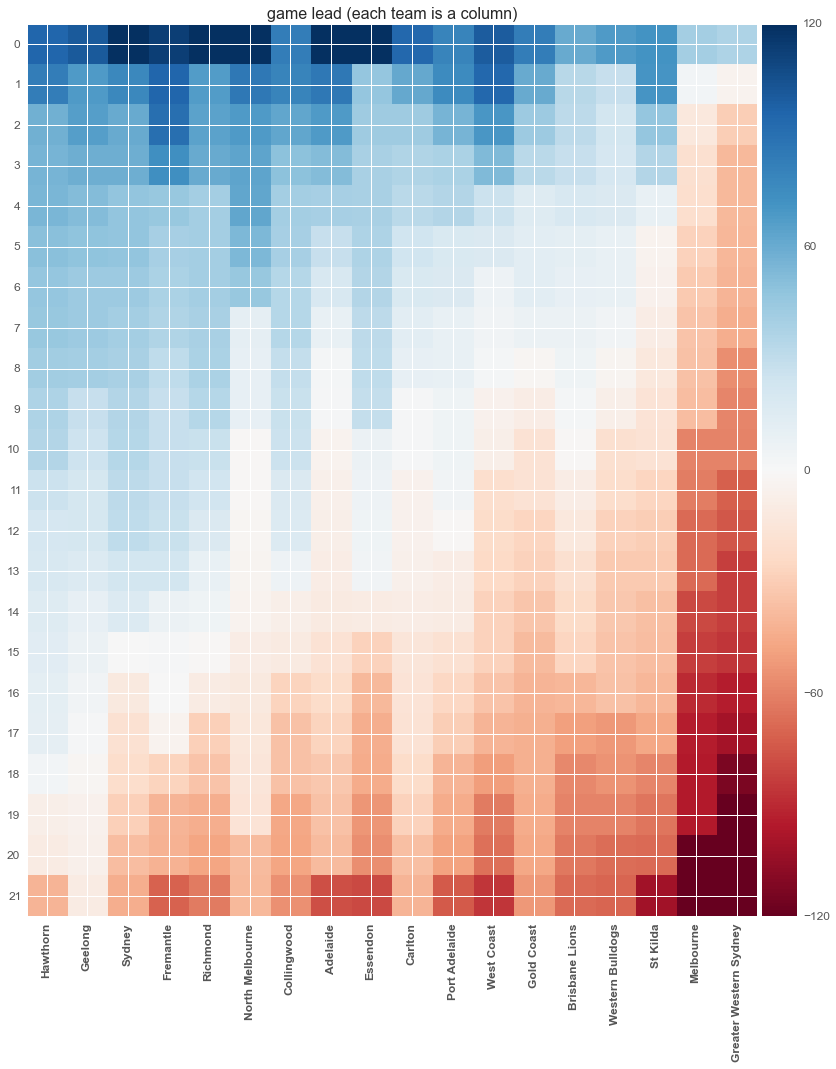

In [184]:
# team performance plot

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(16, 16))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 1),
                 direction='row', axes_pad=0.05, add_all=True,
                 label_mode='1', share_all=False,
                 cbar_location='right', cbar_mode='single',
                 cbar_size='5%', cbar_pad=0.05)

ax = grid[0]
ax.set_title('game lead (each team is a column)', fontsize=16)
ax.tick_params(axis='both', direction='out', labelsize=12)
#im = ax.imshow(df.values, interpolation='nearest', vmax=df.max().max(),
#               vmin=df.min().min(), cmap='RdBu')
im = ax.imshow(sortedteamplay.values, interpolation='nearest', vmax=120, vmin=-120, cmap='RdBu')
#colorbar
ax.cax.colorbar(im)
ax.cax.tick_params(labelsize=12)

ax.set_xticks(np.arange(sortedteamplay.shape[1]))
ax.set_xticklabels(sorted_team, rotation='vertical', fontweight='bold')
ax.set_yticks(np.arange(sortedteamplay.shape[0]))
ax.set_yticklabels(sortedteamplay.index)

In [185]:
sorted_team

array(['Hawthorn', 'Geelong', 'Sydney', 'Fremantle', 'Richmond',
       'North Melbourne', 'Collingwood', 'Adelaide', 'Essendon', 'Carlton',
       'Port Adelaide', 'West Coast', 'Gold Coast', 'Brisbane Lions',
       'Western Bulldogs', 'St Kilda', 'Melbourne',
       'Greater Western Sydney'], dtype=object)

In [ ]:
#g = sns.clustermap(sortedteamplay)

###Plot each game -- game progression by players

In [ ]:
!tail -n 9 allgames_2013.txt

In [187]:
!head -n 10 allstats_2013.txt

1,Adelaide,Essendon,82,117
28m 58s quarter 
Taylor Walker goal,4m 36s,1.0.6 - 0.0.0,,
Ricky Henderson behind,6m 5s,1.1.7 - 0.0.0,,
Richard Douglas goal,8m 8s,2.1.13 - 0.0.0,,
Richard Douglas behind,9m 46s,2.2.14 - 0.0.0,,
Jason Porplyzia goal,11m 35s,3.2.20 - 0.0.0,,
Patrick Dangerfield behind,13m 27s,3.3.21 - 0.0.0,,
Jared Petrenko behind,14m 39s,3.4.22 - 0.0.0,,
,,3.4.22 - 0.1.1,18m 7s,Michael Hurley behind


In [188]:
import re,os,math



gameround = ''
team1 = team2 = ''
score1 = score2 = ''

timestart = 0
timeend = 0

def splitplay(action):
    score = {'behind':1, 'goal':6}
    for act in score:
        #print act, score[act]
        if(act in action):
            ai = action.index(act)
            return [action[0:ai-1], score[act]]
    return [None, 0]

def timeinsec(timetxt):
    timearr = map(int, re.findall(r'\d+', timetxt))
    return timearr[0] * 60 + timearr[1]
    
    
f = open("allstats_ex_finals_2013.csv", "w")

gameid = 0
with open("allstats_2013.txt", "r") as ins:
    for line in ins:
        if 'Finals' in line:
            break
            
        line = line.rstrip('\n')
        if line==',':
            continue
            
        items = line.split(',')

        
        if (items[0].isdigit()) or ('Finals' in line):
            timestart = timeend = 0
            
            if(gameround != items[0]):
                gameround = items[0]
                gameid = 1
            else:
                gameid += 1
                
            team1 = items[1]
            team2 = items[2]
            score1 = items[3]
            score2 = items[4]
            continue
        
        if 'quarter' in line:
            timestart = timeend
            sec = timeinsec(line)
            timeend = timestart + sec
            continue

        newitems = []
        team1action = items[0]
        if team1action == '':
            newitems.extend([None, 0])
        else:
            newitems.extend(splitplay(team1action))
        
        team1time = items[1]
        if team1time != '':
            newitems.append(timeinsec(team1time) + timestart)
            
        team2time = items[3]
        if team2time != '':
            newitems.append(timeinsec(team2time) + timestart)
        
        team2action = items[4]
        if team2action == '':
            newitems.extend([None, 0])
        else:
            newitems.extend(splitplay(team2action))        
        
        newitems.extend([team1, team2, gameround, gameid])#, str(timestart)])
        f.write(','.join(str(item) for item in newitems) + '\n')
        


f.close()


In [1]:
import pandas as pd
allstats = pd.read_csv("allstats_ex_finals_2013.csv", 
            names=['player1','score1', 'time', 'player2', 'score2','team1','team2','round', 'game'])
allstats[:5]

,player1,score1,time,player2,score2,team1,team2,round,game
0,Taylor Walker,6,276,None,0,Adelaide,Essendon,1,1
1,Ricky Henderson,1,365,None,0,Adelaide,Essendon,1,1
2,Richard Douglas,6,488,None,0,Adelaide,Essendon,1,1
3,Richard Douglas,1,586,None,0,Adelaide,Essendon,1,1
4,Jason Porplyzia,6,695,None,0,Adelaide,Essendon,1,1


In [2]:
# 23 rounds per year
import numpy as np
np.unique(allstats.round.values).shape

(23,)

In [3]:
# each round has 9 games (mostly) -- here we test round1
np.unique(allstats.game[allstats.round==1].values)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
from matplotlib.ticker import FuncFormatter
def minsec(x, pos):
    'The two args are the value and tick position'
    return '$%2dm:$%2ds' % (x/60, x%60)

formatter = FuncFormatter(minsec)


    
def plotgame(axes, team1, team2, title, group):
    team1score = group.score1.cumsum()
    team2score = group.score2.cumsum()
    
    s1 = team1score.values[-1]
    s2 = team2score.values[-1]
    #print s1, s2
    scoreboard = ':'.join(str(e) for e in [s1,s2])
    
    gametimes = group.time# + group.qstart
    gameframe = pd.DataFrame({'gametime': gametimes, 'lead':team1score-team2score,team1:team1score, team2:team2score})
    ax = gameframe.plot(ax=axes, 
                        x='gametime', 
                        #y='lead',
                        y=[team1,team2], 
                        #kind='scatter',
                        ylim=(0,120),
                        xlim=(0,7200),
                        figsize=(20, 20),
                        xticks=[0,1800, 3600, 5400, 7200],
                        legend=True, 
                        sharex=True, sharey=True,
                        title=title+scoreboard)
      
    
    #colors: b: blue g: green r: red c: cyan m: magenta y: yellow k: black w: white
    #ax.hlines(0, 0, 7200, color='c', linewidth=2)

    
    ax.get_xaxis().set_major_formatter(formatter)
    ax.set_xlabel('')
    ax.legend(loc='upper left')

    


In [20]:
import matplotlib.pyplot as plt

def plot_data(df, ncols=3):

    # id of row and col of a subgraph
    pcol = 0
    prow = 0

    grouped = df.groupby(['round','game'])
    total = len(grouped)
    nrows = int(total/ncols)
    if total % ncols:
        nrows+=1

    print 'nrows=',nrows, 'ncols=',ncols
    
    graphtogether = False
    #if not graphtogether:
    #    fig, axes = plt.subplots(nrows, ncols)
    #else:
    fig = plt.figure(figsize=(12,12))
    axes = fig.add_axes([0.15, 0.1, 0.7, 0.7])


    for groupid, group in grouped:
        print groupid, group.team1.unique()[0], group.team2.unique()[0]
        gameround = groupid[0]
        gameid = groupid[1]
        team1 = group.team1.unique()[0]
        team2 = group.team2.unique()[0]

        #ax = axes[prow, pcol] if not graphtogether else axes
        #print prow, pcol
        ax = plt.subplot2grid((nrows,ncols),(prow, pcol)) if not graphtogether else axes

        title = (team1+' vs. '+team2) if not graphtogether else 'Score'
        plotgame(ax, team1, team2, title, group)

        pcol+=1
        if pcol == ncols:
            pcol=0
            prow+=1


nrows= 4 ncols= 3
(2, 7) Geelong North Melbourne
(3, 5) Geelong Carlton
(7, 1) Geelong Essendon
(10, 6) Geelong Gold Coast
(14, 6) Geelong Fremantle
(15, 6) Geelong Hawthorn
(16, 3) Geelong Melbourne
(18, 6) Geelong St Kilda
(20, 3) Geelong Port Adelaide
(22, 4) Geelong Sydney
(23, 3) Geelong Brisbane Lions


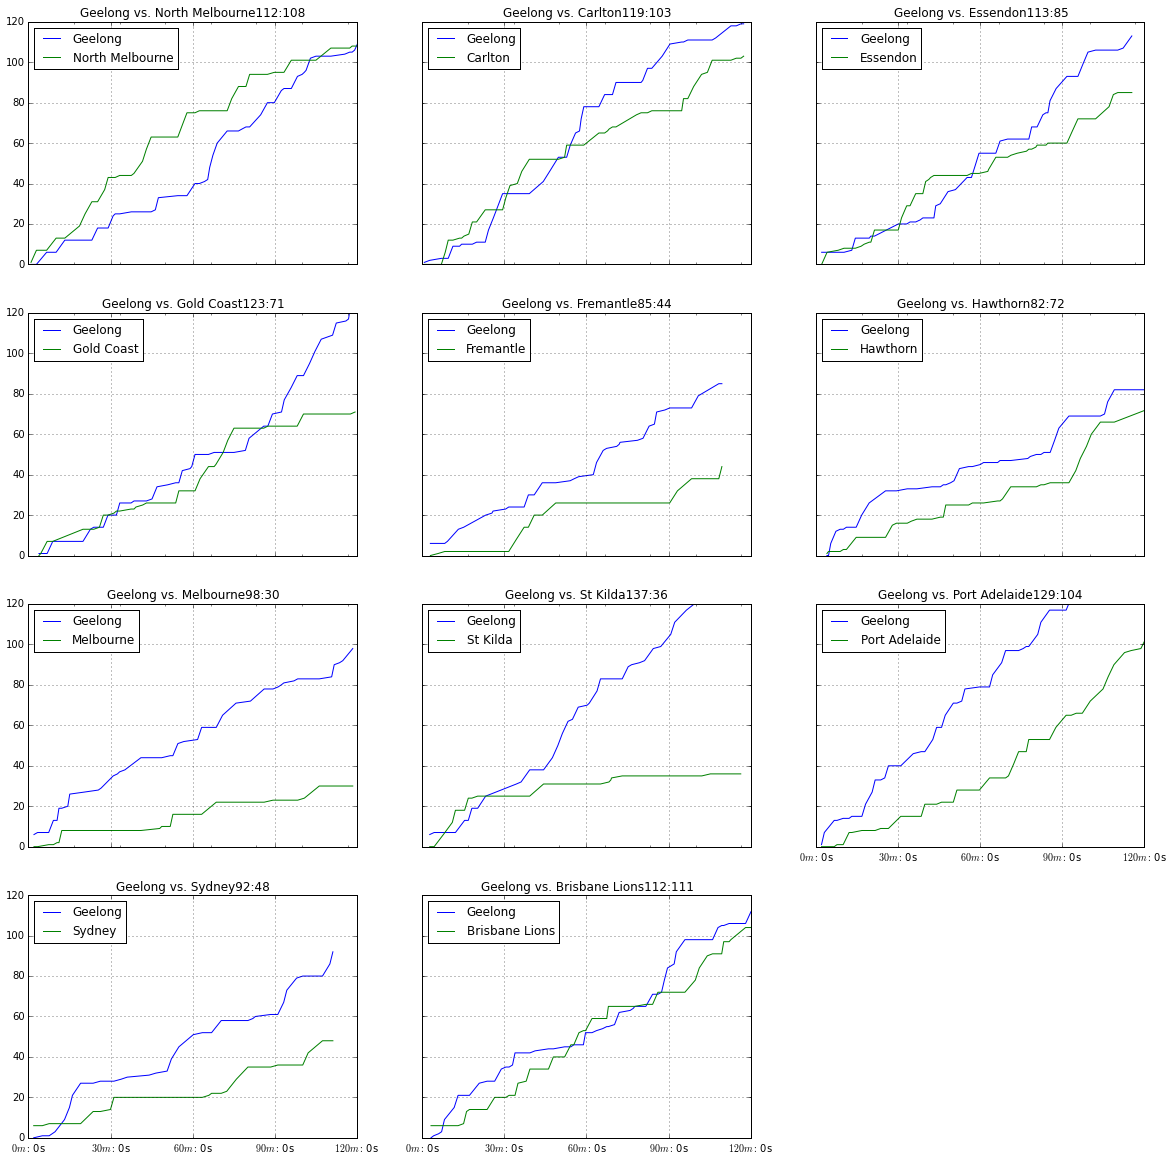

In [25]:
# plot games Geelong played as team1
plotteam = 'Geelong'
thisteam1games = allstats[allstats.team1 == plotteam]
plot_data(thisteam1games)

nrows= 3 ncols= 3
(1, 1) Adelaide Essendon
(1, 2) Fremantle West Coast
(1, 3) Carlton Richmond
(1, 4) Western Bulldogs Brisbane Lions
(1, 5) Greater Western Sydney Sydney
(1, 6) Gold Coast St Kilda
(1, 7) Melbourne Port Adelaide
(1, 8) North Melbourne Collingwood
(1, 9) Hawthorn Geelong


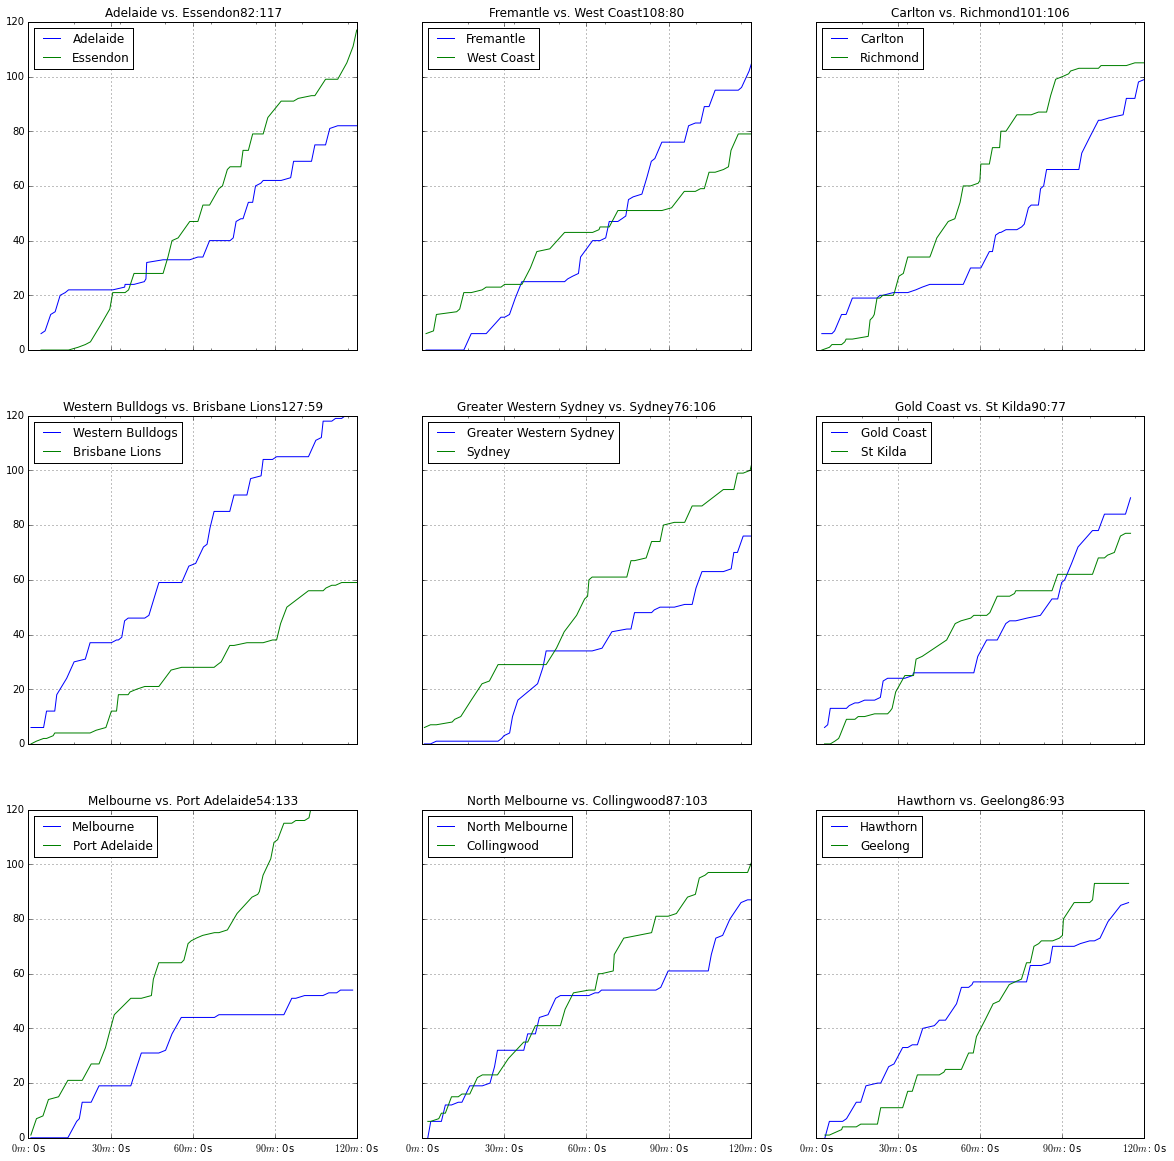

In [26]:
#plot all games in specified round
plotround=1
thisroundgames = allstats[allstats.round == plotround]
plot_data(thisroundgames)

nrows= 4 ncols= 3
(2, 9) West Coast Hawthorn
(3, 8) Collingwood Hawthorn
(6, 4) Adelaide Hawthorn
(10, 7) Melbourne Hawthorn
(12, 1) Carlton Hawthorn
(15, 6) Geelong Hawthorn
(16, 2) Port Adelaide Hawthorn
(18, 1) Essendon Hawthorn
(20, 1) St Kilda Hawthorn
(22, 3) North Melbourne Hawthorn
(23, 1) Sydney Hawthorn


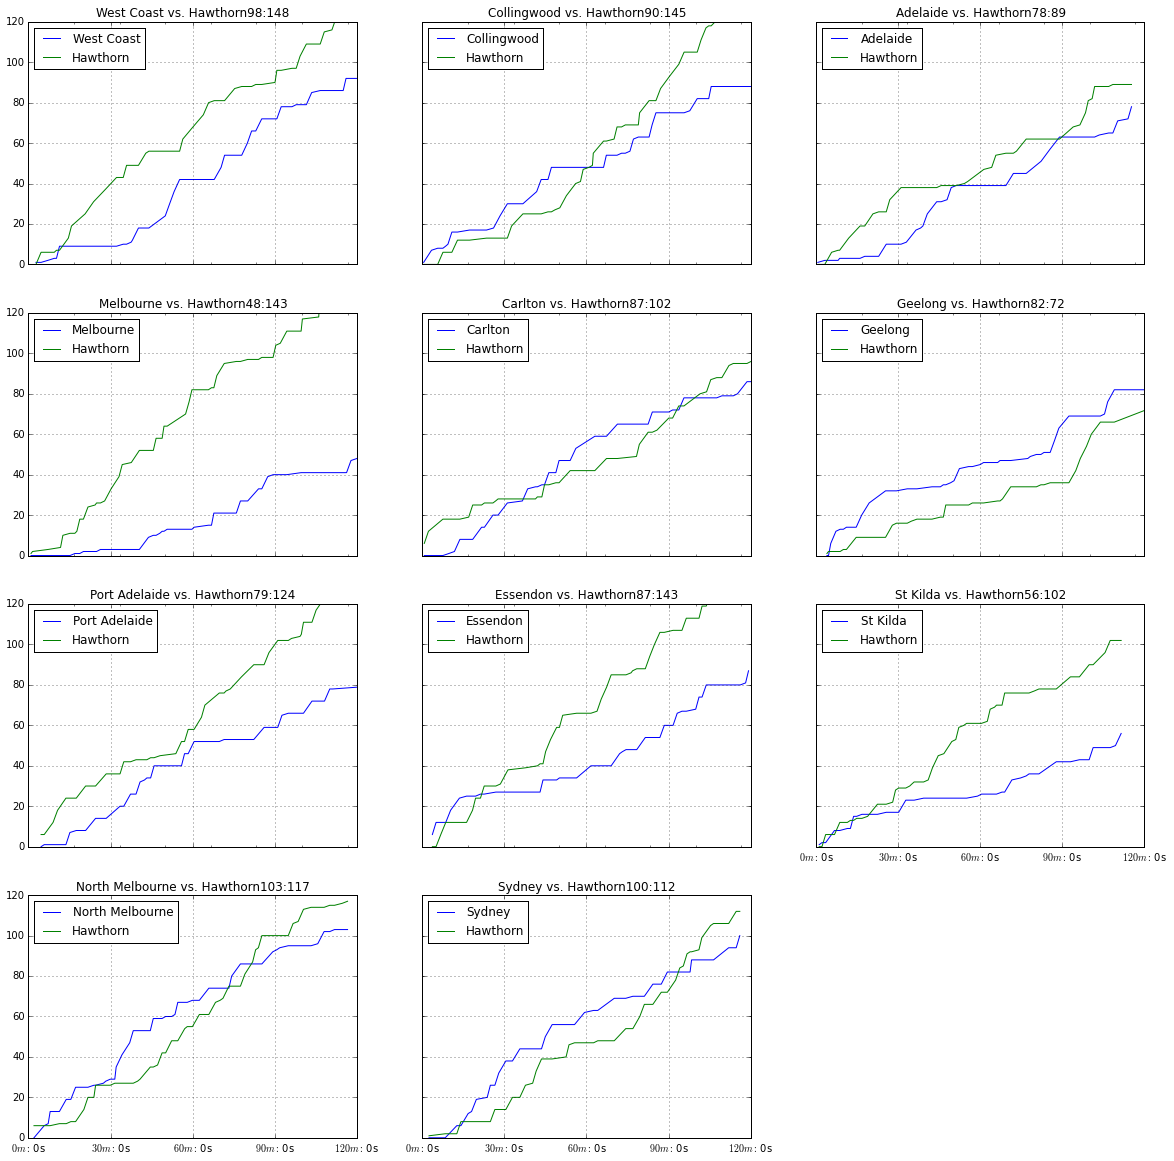

In [27]:
# plot 'Hawthorn' games played as team2
plotteam = 'Hawthorn'
thisteam2games = allstats[allstats.team2 == plotteam]
plot_data(thisteam2games)

In [ ]:
# %load formatstats.py
#
# format stats line into csv tuples and save 
# example stats line: Scott Pendlebury goal,2m 4s,1.0.6 - 0.0.0,,
# example csv tuples: Scott Pendlebury,6,124,None,0,Collingwood,Fremantle,1,1
# columns=['player1','score1', 'time', 'player2', 'score2','team1','team2','round', 'game']
#


import re,os,math


def splitplay(action):
    score = {'behind':1, 'goal':6}
    for act in score:
        #print act, score[act]
        if(act in action):
            ai = action.index(act)
            return [action[0:ai-1], score[act]]
    return [None, 0]

def timeinsec(timetxt):
    timearr = map(int, re.findall(r'\d+', timetxt))
    return timearr[0] * 60 + timearr[1]
    

def format_stats(year):
    filename = "allstats_"+year+".txt"
    exfinals_filename = "allstats_ex_finals_"+year+".csv"
    finals_filename = "allstats_finals_"+year+".csv"

    print filename, exfinals_filename, finals_filename

    exfinals_file = open(exfinals_filename, "w")
    finals_file = open(finals_filename, "w")

    gameround=''
    team1=''
    team2=''
    score1=''
    score2=''

    gameid = 0
    timestart = 0
    timeend = 0
    with open(filename, "r") as ins:
        for line in ins:
            line = line.rstrip('\n')
            if line==',':
                continue

            items = line.split(',')


            if (items[0].isdigit()) or ('Finals' in line):
                timestart = timeend = 0

                if(gameround != items[0]):
                    gameround = items[0]
                    gameid = 1
                else:
                    gameid += 1

                team1 = items[1]
                team2 = items[2]
                score1 = items[3]
                score2 = items[4]
                continue

            if 'quarter' in line:
                timestart = timeend
                sec = timeinsec(line)
                timeend = timestart + sec
                continue

            newitems = []
            team1action = items[0]
            if team1action == '':
                newitems.extend([None, 0])
            else:
                newitems.extend(splitplay(team1action))

            team1time = items[1]
            if team1time != '':
                newitems.append(timeinsec(team1time) + timestart)

            team2time = items[3]
            if team2time != '':
                newitems.append(timeinsec(team2time) + timestart)

            team2action = items[4]
            if team2action == '':
                newitems.extend([None, 0])
            else:
                newitems.extend(splitplay(team2action))        

            newitems.extend([team1, team2, gameround, gameid])#, str(timestart)])

            newline = ','.join(str(item) for item in newitems) + '\n'
            if gameround == 'Finals':
                finals_file.write(newline)
            else:
                exfinals_file.write(newline)

    finals_file.close()
    exfinals_file.close()


if __name__ == '__main__':
    import sys
    format_stats(sys.argv[1])


In [30]:
year='2013'
final_filename = "allstats_finals_"+year+".csv"
final_stats = pd.read_csv(final_filename,
                           names=['player1','score1', 'time', 'player2', 'score2','team1','team2','round', 'game'])
final_stats.head(5)

,player1,score1,time,player2,score2,team1,team2,round,game
0,None,0,67,Mike Pyke,1,Hawthorn,Sydney,Finals,1
1,Bradley Hill,6,382,None,0,Hawthorn,Sydney,Finals,1
2,None,0,451,Kurt Tippett,6,Hawthorn,Sydney,Finals,1
3,None,0,529,Josh Kennedy,1,Hawthorn,Sydney,Finals,1
4,None,0,565,Dan Hannebery,1,Hawthorn,Sydney,Finals,1


nrows= 3 ncols= 3
('Finals', 1) Hawthorn Sydney
('Finals', 2) Fremantle Geelong
('Finals', 3) Port Adelaide Collingwood
('Finals', 4) Carlton Richmond
('Finals', 5) Geelong Port Adelaide
('Finals', 6) Sydney Carlton
('Finals', 7) Hawthorn Geelong
('Finals', 8) Fremantle Sydney
('Finals', 9) Hawthorn Fremantle


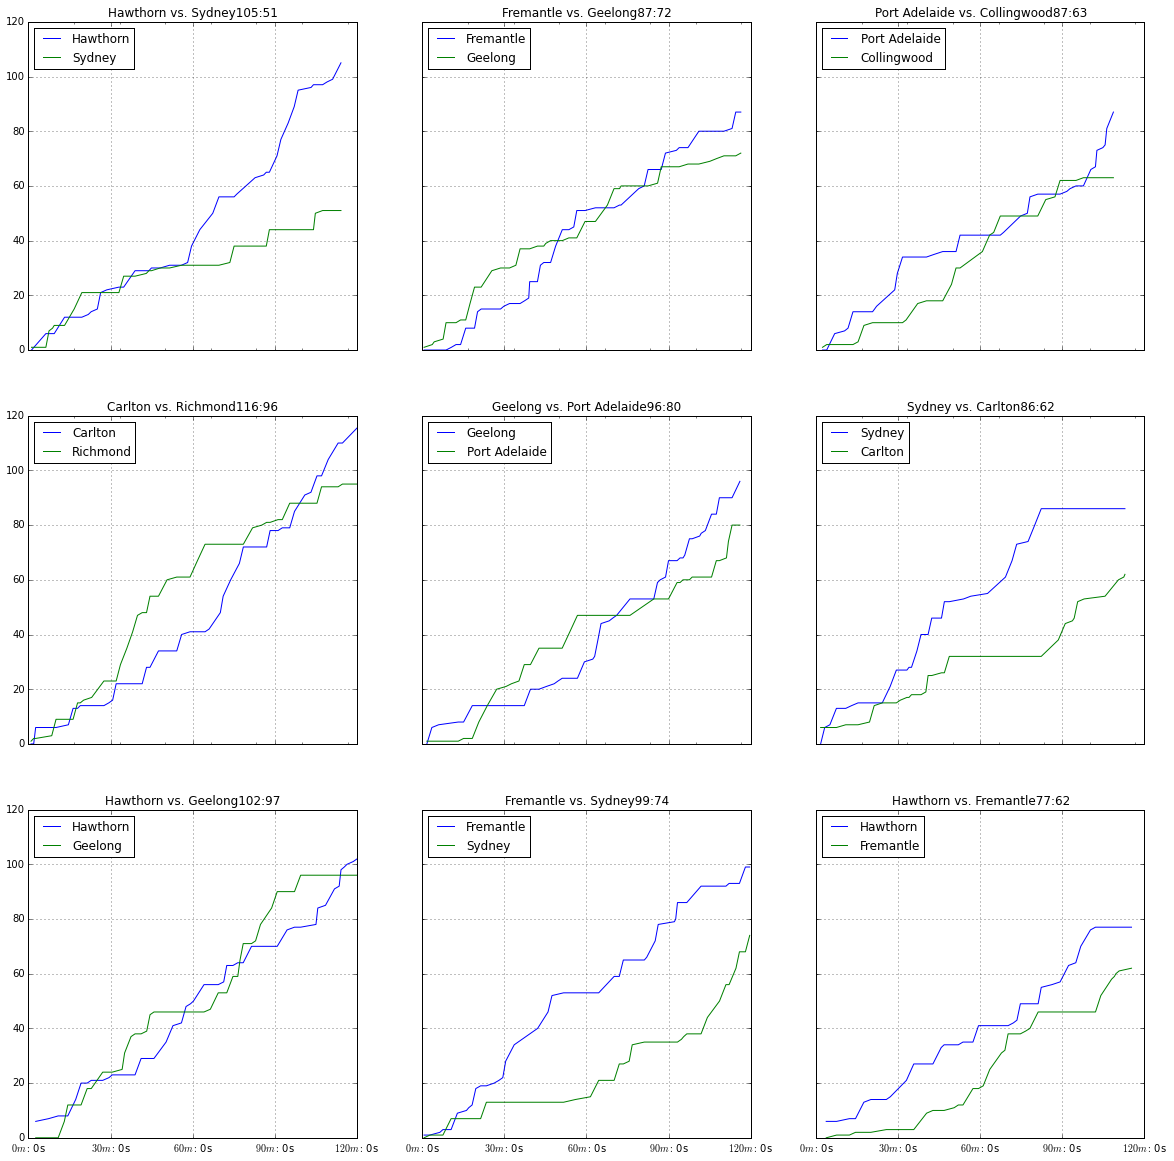

In [31]:
plot_data(final_stats)

In [333]:
for g,group in allstats.groupby('team1'):
    print g, group.player1.unique().shape

Adelaide (32,)
Brisbane Lions (33,)
Carlton (31,)
Collingwood (34,)
Essendon (34,)
Fremantle (29,)
Geelong (37,)
Gold Coast (35,)
Greater Western Sydney (29,)
Hawthorn (32,)
Melbourne (37,)
North Melbourne (28,)
Port Adelaide (27,)
Richmond (30,)
St Kilda (35,)
Sydney (29,)
West Coast (33,)
Western Bulldogs (37,)


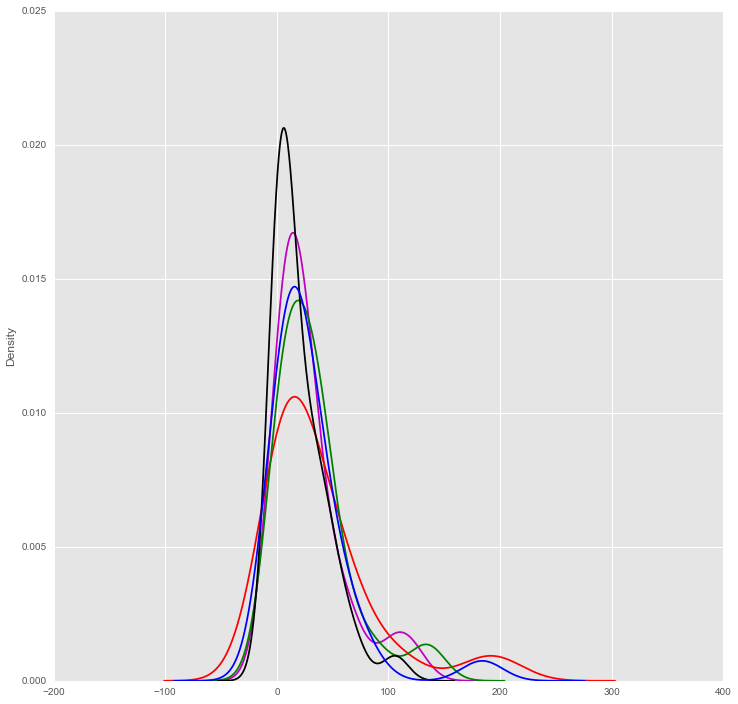

In [346]:
tp = allstats.pivot_table('score1', columns=['team1', 'player1'], aggfunc=sum)
#tp

ax1 = tp['Western Bulldogs'].plot(kind='kde', color='m')
tp['Hawthorn'].plot(kind='kde', color='r')
tp['Geelong'].plot(kind='kde', color='g')
tp['Melbourne'].plot(kind='kde', color='k')
tp['Greater Western Sydney'].plot(kind='kde', color='b')

#lines, labels = ax1.get_legend_handles_labels()
#ax1.legend(lines[:2], labels[:2], loc='best')

In [195]:
team2_players = allstats.pivot_table('score2', index='player2', aggfunc=sum)
team2_players.shape
#sns.distplot(team2_players)

(530,)

In [196]:
team1_players = allstats.pivot_table('score1', index='player1', aggfunc=sum)
team1_players.shape
#sns.distplot(team1_players)

(544,)

In [197]:
allscore = team1_players.add(team2_players, fill_value=0)
allscore.shape

(591,)

In [198]:
allscore.sort(ascending=False)


In [234]:
allscore[0:5]

Rushed             920
Josh Kennedy       475
Travis Cloke       446
Jarryd Roughead    436
Jeremy Cameron     399
Name: score1, dtype: float64

In [235]:
allscore[-5:]

Shaun Edwards       1
Orren Stephenson    1
Jake Batchelor      1
Will Langford       1
None                0
Name: score1, dtype: float64

In [236]:
result = allscore[1:590]
#result

In [255]:
topplayer = result.index
#topplayer

In [256]:
#result.to_frame()
t = pd.DataFrame({'player':result.index, 'totalscore':result.values})
t

,player,totalscore
0,Josh Kennedy,475
1,Travis Cloke,446
2,Jarryd Roughead,436
3,Jeremy Cameron,399
4,Lance Franklin,384
5,Jack Riewoldt,375
6,Lindsay Thomas,341
7,Nick Riewoldt,336
8,Drew Petrie,307
9,Tom Hawkins,294


In [261]:
def get_team(player):
    inteam2=allstats[allstats.player2==player]
    inteam1=allstats[allstats.player1==player]
    if not inteam2.empty:
        return inteam2[:1].team2.values[0]
    elif not inteam1.empty:
        return inteam1[:1].team1.values[0]
    
get_team('Will Langford')
get_team('Shaun Edwards')

'Greater Western Sydney'

In [262]:
t['team'] = topplayer.map(get_team)
t

,player,totalscore,team
0,Josh Kennedy,475,West Coast
1,Travis Cloke,446,Collingwood
2,Jarryd Roughead,436,Hawthorn
3,Jeremy Cameron,399,Greater Western Sydney
4,Lance Franklin,384,Hawthorn
5,Jack Riewoldt,375,Richmond
6,Lindsay Thomas,341,North Melbourne
7,Nick Riewoldt,336,St Kilda
8,Drew Petrie,307,North Melbourne
9,Tom Hawkins,294,Geelong


In [221]:
nperf = pd.DataFrame({'team':perf.index, 'teamscore':perf.values})
nperf['rank']=nperf.index.values + 1
nperf

,team,teamscore,rank
0,Hawthorn,664,1
1,Geelong,633,2
2,Sydney,550,3
3,Fremantle,517,4
4,Richmond,400,5
5,North Melbourne,377,6
6,Collingwood,280,7
7,Adelaide,155,8
8,Essendon,145,9
9,Carlton,133,10


In [263]:
#http://chrisalbon.com/python/pandas_join_merge_dataframe.html
player_team = pd.merge(t, nperf, on='team', how='outer')
player_team

,player,totalscore,team,teamscore,rank
0,Josh Kennedy,475,West Coast,-101,12
1,Jack Darling,279,West Coast,-101,12
2,Mark LeCras,207,West Coast,-101,12
3,Josh Hill,187,West Coast,-101,12
4,Dean Cox,96,West Coast,-101,12
5,Bradd Dalziell,93,West Coast,-101,12
6,Jamie Cripps,77,West Coast,-101,12
7,Luke Shuey,62,West Coast,-101,12
8,Chris Masten,57,West Coast,-101,12
9,Ashton Hams,53,West Coast,-101,12


In [265]:
#player_team[['totalscore', 'teamscore']].plot(kind='bar')

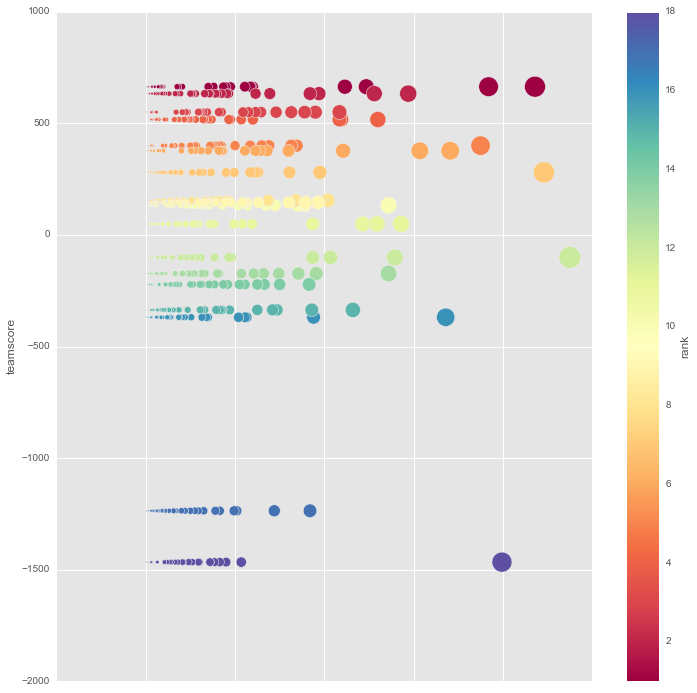

In [269]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
player_team.plot(kind='scatter', x='totalscore', y='teamscore',
                 c='rank', cmap=cmap,
                 s=player_team['totalscore'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120d9f8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1190ce6d0>]], dtype=object)

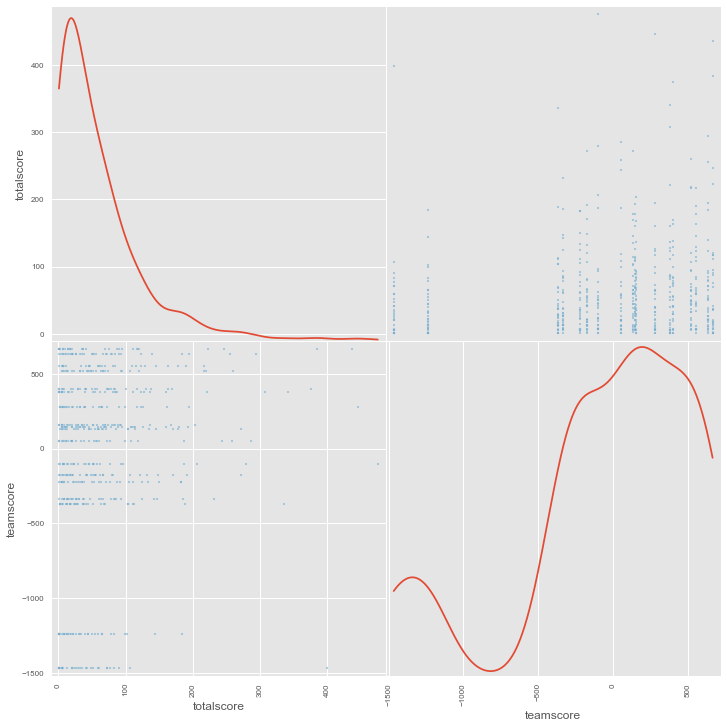

In [316]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix, alpha=0.5, figsize=(12, 12), diagonal='kde')

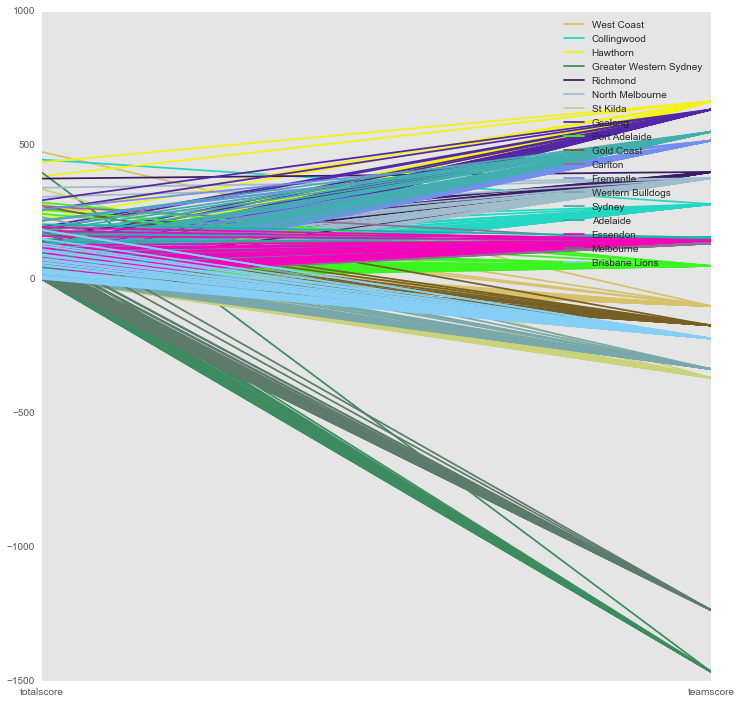

In [318]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(player_team[['team', 'totalscore', 'teamscore']], 'team')